### Reason for converting categorical features

ML models can only have information as numbers. So our goal is to convert categorical features into numeric

Note that even after coverting categorical features to numeric, we don't scale these values.

Different ways to transform categorical features:

1) Oridnal Encoder
2) Label Encoder is used to transform only target feature
3) Pandas cat.codes
4) One-Hot Encoder

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.compose import make_column_selector as col_selector

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split, GridSearchCV

In [4]:
df = pd.read_csv("population.csv")

In [5]:
print(df.head())
print(df.shape)

   Age           Job Type  Final Weight   Education  Education Number  \
0   39          State-gov         77516   Bachelors                13   
1   50   Self-emp-not-inc         83311   Bachelors                13   
2   38            Private        215646     HS-grad                 9   
3   53            Private        234721        11th                 7   
4   28            Private        338409   Bachelors                13   

        Marital Status           Job Title    Relationship    Race   Gender  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   Capital Gain  Capital Loss  Hours per week         Country  Income  
0          217

In [6]:
df.head()

,Age,Job Type,Final Weight,Education,Education Number,Marital Status,Job Title,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
print(df.columns)
print(df.dtypes)

Index(['Age', 'Job Type', 'Final Weight', 'Education', 'Education Number',
       'Marital Status', 'Job Title', 'Relationship', 'Race', 'Gender',
       'Capital Gain', 'Capital Loss', 'Hours per week', 'Country', 'Income'],
      dtype='object')
Age                  int64
Job Type            object
Final Weight         int64
Education           object
Education Number     int64
Marital Status      object
Job Title           object
Relationship        object
Race                object
Gender              object
Capital Gain         int64
Capital Loss         int64
Hours per week       int64
Country             object
Income              object
dtype: object


#### Observations after looking at df.head() and df.dtypes

We have to fill this

#### Sanity Checks
Checking for null values

In [8]:
df.isnull().sum()

Age                 0
Job Type            0
Final Weight        0
Education           0
Education Number    0
Marital Status      0
Job Title           0
Relationship        0
Race                0
Gender              0
Capital Gain        0
Capital Loss        0
Hours per week      0
Country             0
Income              0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Job Type          32561 non-null  object
 2   Final Weight      32561 non-null  int64 
 3   Education         32561 non-null  object
 4   Education Number  32561 non-null  int64 
 5   Marital Status    32561 non-null  object
 6   Job Title         32561 non-null  object
 7   Relationship      32561 non-null  object
 8   Race              32561 non-null  object
 9   Gender            32561 non-null  object
 10  Capital Gain      32561 non-null  int64 
 11  Capital Loss      32561 non-null  int64 
 12  Hours per week    32561 non-null  int64 
 13  Country           32561 non-null  object
 14  Income            32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### What are the unique values in different columns

In [10]:
print(df["Job Type"].unique())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


In [11]:
print(df["Job Type"].value_counts())

Job Type
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64


In [12]:
print(df["Country"].value_counts())
print(df["Job Title"].value_counts())
print(df["Marital Status"].value_counts())
print(df["Race"].value_counts())

Country
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                         

#### Important Note
Severals rows have "?" 
We will replace "?" with "Other" 

In [13]:
df["Job Type"] = df["Job Type"].str.replace("?", "Other")
df["Country"] = df["Country"].str.replace("?", "Other")
df["Job Title"] = df["Job Title"].str.replace("?", "Other")

print(df["Job Type"].unique())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Other' ' Self-emp-inc' ' Without-pay' ' Never-worked']


#### Dropping Education column
Education Number is a numeric column that contains information about Education, we will drop Education column. 

In [14]:
dfy = df["Income"]
df = df.drop(["Income", "Education"], axis=1)
df1 = df.copy(deep=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Job Type          32561 non-null  object
 2   Final Weight      32561 non-null  int64 
 3   Education Number  32561 non-null  int64 
 4   Marital Status    32561 non-null  object
 5   Job Title         32561 non-null  object
 6   Relationship      32561 non-null  object
 7   Race              32561 non-null  object
 8   Gender            32561 non-null  object
 9   Capital Gain      32561 non-null  int64 
 10  Capital Loss      32561 non-null  int64 
 11  Hours per week    32561 non-null  int64 
 12  Country           32561 non-null  object
dtypes: int64(6), object(7)
memory usage: 3.2+ MB


### Creating categorical_cols and int_cols objects

We use col_selector to do this. 
We also create categorical_features and numerical_features.

In [16]:
# categorical_cols_obj is a categorical object
categorical_cols_obj = col_selector(dtype_include=object)
print(type(categorical_cols_obj))

# categorical_features is a list of  column names of features with catergorical data
categorical_features = categorical_cols_obj(df)
print(type(categorical_features))

# numeric_features is a list of column names of features with numeric data
int_cols_obj = col_selector(dtype_include="int64")
numeric_features = int_cols_obj(df)

print(categorical_features)
print(numeric_features)

<class 'sklearn.compose._column_transformer.make_column_selector'>
<class 'list'>
['Job Type', 'Marital Status', 'Job Title', 'Relationship', 'Race', 'Gender', 'Country']
['Age', 'Final Weight', 'Education Number', 'Capital Gain', 'Capital Loss', 'Hours per week']


### Creating data frame with categorical_features

Creating an OrdinalEncoder object and performing a fit_transform on the df_cat dataframe.

In the below example, we are not scaling columns with numeric_features. 

We are performing hstack to put encoded categorical dataframe with the numeric dataframe.

Since our target variable is categorical, we perform LabelEncoder on this. 

Building a Logistic Regression model with oridnal encoded data.

In [17]:
# df_cat will have columns that are categorical in nature
df_cat = df[categorical_features]

# creating an instance of ordinalencoder
ob_encoded = preprocessing.OrdinalEncoder()

# performing fit_transform on df_cat
cat_encoded = ob_encoded.fit_transform(df_cat)

# putting the categorical converted dataframe next to numeric_features dataframe
x = np.hstack([cat_encoded, np.array(df[numeric_features])])
print(x.shape)

# applying labelencoder only on the target feature
yb = preprocessing.LabelEncoder()
y = yb.fit_transform(dfy)



(32561, 13)


#### Building a Logistic Regressor using the above x and y 

In [18]:
# train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

# creating an instance of logistic regression
clf = LogisticRegression(max_iter=500)

# building the model
clf.fit(x_train, y_train)

# using model to predict on x_test
y_pred = clf.predict(x_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8088438507600184


Logistic AUC = 0.62
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5026
           1       0.72      0.26      0.39      1487

    accuracy                           0.81      6513
   macro avg       0.77      0.62      0.64      6513
weighted avg       0.80      0.81      0.77      6513



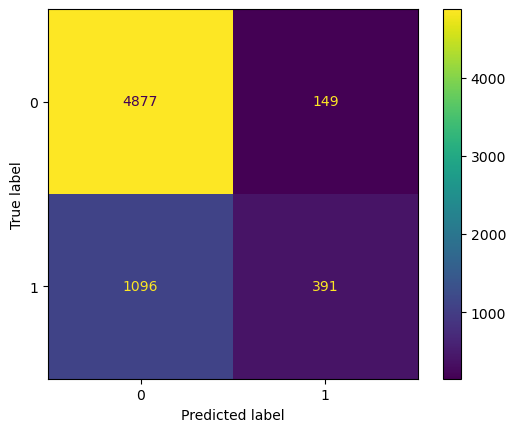

In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()




logit_roc_auc = roc_auc_score(y_test, y_pred)
print("Logistic AUC = %0.2f" %logit_roc_auc)
print(classification_report(y_test, y_pred))

### Pandas cat.codes

Using Pandas cat.codes for Categorical feature conversion. 
Then Using StandardScaler for standarizing the numeric features.

In [20]:
"""
Recall - we already have categorical features and numeric_features from the previous cell.
Here it is again.


categorical_cols_obj = col_selector(dtype_include=object)
print(type(categorical_cols_obj))
categorical_features = categorical_cols_obj(df)
print(type(categorical_features))

int_cols_obj = col_selector(dtype_include="int64")
numeric_features = int_cols_obj(df)

print(categorical_features)
print(numeric_features)

"""


for i in range(len(categorical_features)):
    df1[categorical_features[i]] = df1[categorical_features[i]].astype('category')
    df1[categorical_features[i]] = df1[categorical_features[i]].cat.codes


sc = StandardScaler()

x = np.hstack([df1[categorical_features], sc.fit_transform(df1[numeric_features])])

print(x.shape)


"""
Recall

our y is 

yb = preprocessing.LabelEncoder()
y = yb.fit_transform(dfy)
"""


x_train, x_test, y_train, y_test = train_test_split(
                                   x, y, test_size = 0.2, random_state=1)

clf_catcodes = LogisticRegression(max_iter=500)
clf_catcodes.fit(x_train, y_train)

y_pred = clf_catcodes.predict(x_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

(32561, 13)
Accuracy: 0.8275756179947796


Logistic AUC = 0.69
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      5026
           1       0.69      0.45      0.54      1487

    accuracy                           0.83      6513
   macro avg       0.77      0.69      0.72      6513
weighted avg       0.81      0.83      0.81      6513



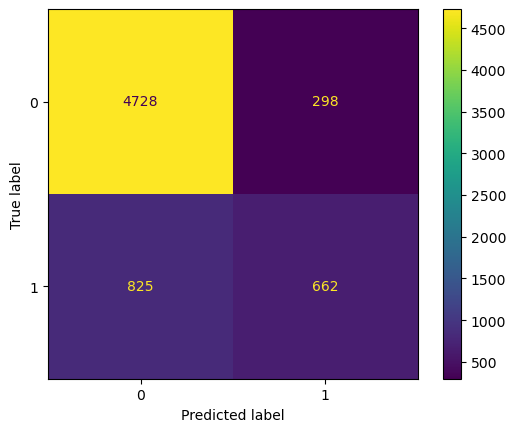

In [21]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_catcodes.classes_)
disp.plot()



logit_roc_auc = roc_auc_score(y_test, y_pred)
print("Logistic AUC = %0.2f" %logit_roc_auc)
print(classification_report(y_test, y_pred))

### Using Standard Scaler and make_pipeline

Performing StandardScaler only on numeric columns and then using 
make_pipeline.

Syntax for make_pipeline(list of estimator objects, model)

The numeric columns in our dataset are:
'Age', 'Final Weight', 'Education Number', 'Capital Gain', 'Capital Loss', 'Hours per week'

In [22]:
x_train, x_test, y_train, y_test = train_test_split(df[numeric_features], y, test_size = 0.2, random_state=1)


st = StandardScaler()

"""
Example of Pipeline. Here we have to give the name of the estimator as a string 
followed by the estimator. 
In make_pipeline, we can just provide the list of estimators. 


clf = Pipeline([('preprocessor', preprocessor),
                ('classifier', LogisticRegression(max_iter=500))])
"""


mpipe = make_pipeline(st, LogisticRegression())

mpipe_fit = mpipe.fit(x_train, y_train)

ym_pred = mpipe.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, ym_pred))

Accuracy: 0.8182097343773991


Logistic AUC = 0.67
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5026
           1       0.68      0.38      0.49      1487

    accuracy                           0.82      6513
   macro avg       0.76      0.67      0.69      6513
weighted avg       0.80      0.82      0.80      6513



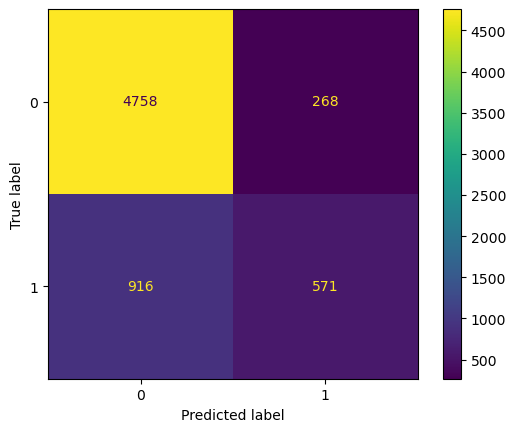

In [23]:
cm = confusion_matrix(y_test, ym_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=mpipe_fit.classes_)
disp.plot()



logit_roc_auc = roc_auc_score(y_test, ym_pred)
print("Logistic AUC = %0.2f" %logit_roc_auc)
print(classification_report(y_test, ym_pred))

### Column Transform  

#### Encoding using Oridnal and scaling the numeric columns

Performing StandardScaler and OrdinalEncoder 
on numeric columns and categorical columns respectively and 
then using make_pipeline.


In [24]:
np.random.seed(0)

X = df

preprocessor = ColumnTransformer(
               transformers=[
               ('num', StandardScaler(), numeric_features),
               ('cat', OrdinalEncoder(), categorical_features)])

#clf = Pipeline(steps=[('preprocessor', preprocessor),
#                      ('classifier', LogisticRegression())])

clf = make_pipeline(preprocessor, LogisticRegression(max_iter=500))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

clf_make = clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

y_pred = clf_make.predict(X_test)

model score: 0.817


Logistic AUC = 0.69
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4918
           1       0.70      0.45      0.55      1595

    accuracy                           0.82      6513
   macro avg       0.77      0.69      0.72      6513
weighted avg       0.80      0.82      0.80      6513



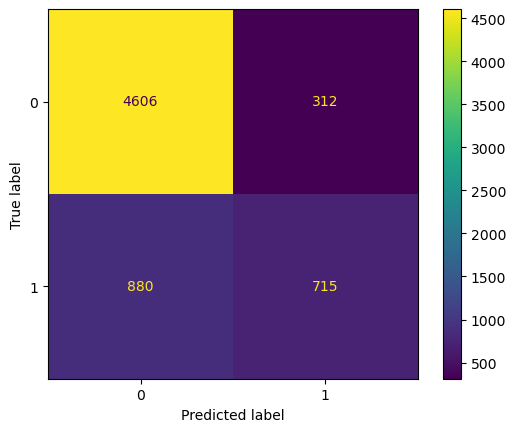

In [25]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_make.classes_)
disp.plot()



logit_roc_auc = roc_auc_score(y_test, y_pred)
print("Logistic AUC = %0.2f" %logit_roc_auc)
print(classification_report(y_test, y_pred))

### Explanation for OneHot Encoder 

Let's say our feature has 3 labels or categories - orange, apple and kiwi 

orange (1, 0, 0)

apple (0, 1, 0)

kiwi (0, 0, 1)

### OneHotEncoder


Performing StandardScaler and OneHotEncoder 
on numeric columns and categorical columns respectively and 
then using make_pipeline.


In [26]:
np.random.seed(0)


X = df
print(X.shape)


preprocessor = ColumnTransformer(
               transformers=[
               ('num', StandardScaler(), numeric_features),
               ('cat', OneHotEncoder(), categorical_features)])


#clf = Pipeline(steps=[('preprocessor', preprocessor),
#                      ('classifier', LogisticRegression())])

clf = make_pipeline(preprocessor, LogisticRegression(max_iter=500))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

clf_onehot = clf.fit(X_train, y_train)

y_pred = clf_onehot.predict(X_test)

print("model score: %.3f" % clf_onehot.score(X_test, y_test))

(32561, 13)
model score: 0.847


Logistic AUC = 0.77
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4918
           1       0.72      0.61      0.66      1595

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.78      6513
weighted avg       0.84      0.85      0.84      6513



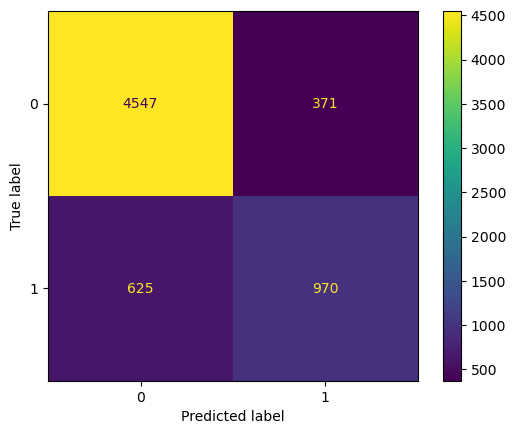

In [27]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_onehot.classes_)
disp.plot()



logit_roc_auc = roc_auc_score(y_test, y_pred)
print("Logistic AUC = %0.2f" %logit_roc_auc)
print(classification_report(y_test, y_pred))

"""
In-class activity: Summarize the steps involved in categorical feature conversion specifically the different encoders. 
"""


"""
In-class activity: List the models that we build with different encoders along with their accuracy scores. What is the conclusion? 
Which model is best for this dataset?
"""

